In [295]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
mpl.rcParams['image.cmap'] = 'hot_r'

%matplotlib inline

In [296]:
! ls

CalibrationShubham_27Nov.txt
Config1_Run258to722_v7_calib.txt
Config1_Run258to722_v7_calib_fix.txt
calibration_map_26_EE_layers_plus_11_central_FH_layers_v7_with_flag.txt
compare_calibs.ipynb
config1_layer_geom_v5.txt
config1_run258to722_v7_fittingoutput.txt
hgcal_calibration_October2018_JuneCalibForEE.txt
hgcal_calibration_config1_oct2018_fromOctTB.txt
merge_calibfiles.ipynb


In [297]:
## Layer config
fname = "config1_layer_geom_v5.txt"
df_layout = pd.read_csv(fname, delim_whitespace=True, names = ['Layer','SubDetBit','SubDet','IV','IU','Module_ID'])

In [298]:
df_layout[['Layer','Module_ID']].head()

Layer  Module_ID
0      1         78
1      2         90
2      3         89
3      4         88
4      5         77

In [299]:
## MIP calibration
#fname = "CalibrationShubham_27Nov.txt"
fname = "calibration_map_26_EE_layers_plus_11_central_FH_layers_v7_with_flag.txt"
df_mip_oct = pd.read_csv(fname, delim_whitespace=True)

In [300]:
df_mip_oct.head()

Module  Chip  Channel    MIP  chi2/ndf  error_on_MIP  use_average
0      78     0        0  44.78      0.47          1.32            0
1      78     0        2  42.84      0.64          0.37            0
2      78     0        4  41.39      1.01          0.20            0
3      78     0        6  43.72      0.53          2.58            0
4      78     0        8  41.87      0.89          0.19            0

Add ADC_to_MIP as 1 / MIP

In [301]:
df_mip_oct['ADC_To_MIP'] = 1/df_mip_oct['MIP']

In [302]:
## HG/LG/TOT October 2018
#fname = "config1_run258to722_v7_fittingoutput.txt"
fname = "Config1_Run258to722_v7_calib_fix.txt"
df_gain_oct = pd.read_csv(fname, delim_whitespace=True)

In [303]:
df_gain_oct['Module_ID'] = df_gain_oct['Module_ID'].astype(int)

In [304]:
df_gain_oct.head()

Layer  Module_ID  ASIC_ID  Channel  ADC_To_MIP  \
0      0         78        0        0          -1   
1      0         78        0        2          -1   
2      0         78        0        4          -1   
3      0         78        0        6          -1   
4      0         78        0        8          -1   

   LowGain_To_HighGain_Transition  LowGain_To_HighGain_Conversion  \
0                         1981.94                         6.97446   
1                         2199.04                         7.15292   
2                         2425.46                         7.09049   
3                         1574.05                         6.42506   
4                         1861.80                         7.71961   

   TOT_To_LowGain_Transition  TOT_To_LowGain_Conversion  TOT_Offset  HLType  \
0                     1200.0                        5.0       180.0       1   
1                     1200.0                        5.0       180.0       1   
2                     1200.0                        5.0       180.0       1   
3                     1200.0                        5.0       180.0       1   
4                     1200.0                        5.0       180.0       1   

   LTType  HGLG_FitSKI  LGTOTFitSKI  
0       0           24           -1  
1       0           24           -1  
2       0           24           -1  
3       0           24           -1  
4       0           24           -1

In [305]:
#df_gain_oct['ADC_To_MIP'] = 0.0227#1/50.

In [306]:
df_gain_oct['Fully_calibrated'] = df_gain_oct['LTType'] & df_gain_oct['HLType'] 

(array([10649.,     0.,  1383.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 1 Patch objects>)

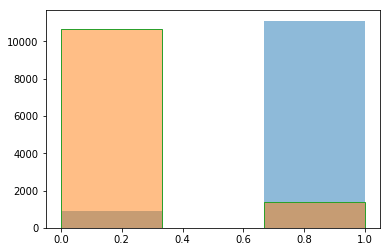

In [307]:
plt.hist(df_gain_oct['HLType'], 3, alpha = 0.5)
plt.hist(df_gain_oct['LTType'], 3, alpha = 0.5)
plt.hist(df_gain_oct['Fully_calibrated'], 3, histtype= 'step')

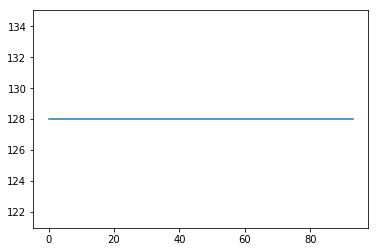

In [308]:
plt.plot(df_gain_oct.groupby('Layer').size())

### Load June calib file for cross-check

In [309]:
## June EE calib
fname = "hgcal_calibration_October2018_JuneCalibForEE.txt"
df_calib_june = pd.read_csv(fname, delim_whitespace=True)

In [310]:
df_calib_june.head()

#Module_ID  #ASIC_ID  #Channel  #ADC_To_MIP  \
0          78         0         0     0.023352   
1          78         0         2     0.022663   
2          78         0         4     0.023416   
3          78         0         6     0.023246   
4          78         0         8     0.022985   

   #LowGain_To_HighGain_Transition  #LowGain_To_HighGain_Conversion  \
0                          1836.49                          8.00345   
1                          2169.56                          8.05075   
2                          2305.53                          8.08835   
3                          1798.79                          8.07501   
4                          1843.12                          8.18347   

   #TOT_To_LowGain_Transition  #TOT_To_LowGain_Conversion  #TOT_Offset  \
0                        1113                         5.0          177   
1                        1113                         5.0          177   
2                        1113                         5.0          177   
3                        1113                         5.0          177   
4                        1113                         5.0          177   

   #Fully_calibrated  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

Get column names from june file

In [311]:
calib_cols = df_calib_june.columns.values

In [312]:
len(calib_cols)

10

In [313]:
gain_cols = df_gain_oct.columns.values

In [314]:
calib_cols =  np.array([col.replace('#',"") for col in calib_cols])

In [315]:
df_calib_june.columns = calib_cols

In [316]:
good_gain_cols = []

for col in calib_cols:
    if col in gain_cols:
        print 'in', col
        good_gain_cols.append(col)
    else:
        print 'out', col

in Module_ID
in ASIC_ID
in Channel
in ADC_To_MIP
in LowGain_To_HighGain_Transition
in LowGain_To_HighGain_Conversion
in TOT_To_LowGain_Transition
in TOT_To_LowGain_Conversion
in TOT_Offset
in Fully_calibrated


In [317]:
good_gain_cols

['Module_ID',
 'ASIC_ID',
 'Channel',
 'ADC_To_MIP',
 'LowGain_To_HighGain_Transition',
 'LowGain_To_HighGain_Conversion',
 'TOT_To_LowGain_Transition',
 'TOT_To_LowGain_Conversion',
 'TOT_Offset',
 'Fully_calibrated']

Create new calib file from the gain calib file using the right columns

In [318]:
df_calib_oct = df_gain_oct[good_gain_cols].copy()

In [319]:
df_calib_oct.head()

Module_ID  ASIC_ID  Channel  ADC_To_MIP  LowGain_To_HighGain_Transition  \
0         78        0        0          -1                         1981.94   
1         78        0        2          -1                         2199.04   
2         78        0        4          -1                         2425.46   
3         78        0        6          -1                         1574.05   
4         78        0        8          -1                         1861.80   

   LowGain_To_HighGain_Conversion  TOT_To_LowGain_Transition  \
0                         6.97446                     1200.0   
1                         7.15292                     1200.0   
2                         7.09049                     1200.0   
3                         6.42506                     1200.0   
4                         7.71961                     1200.0   

   TOT_To_LowGain_Conversion  TOT_Offset  Fully_calibrated  
0                        5.0       180.0                 0  
1                        5.0       180.0                 0  
2                        5.0       180.0                 0  
3                        5.0       180.0                 0  
4                        5.0       180.0                 0

Set multi index

In [320]:
df_calib_oct.set_index(['Module_ID','ASIC_ID','Channel'], inplace = True)
df_mip_oct.set_index(['Module','Chip','Channel'], inplace = True)

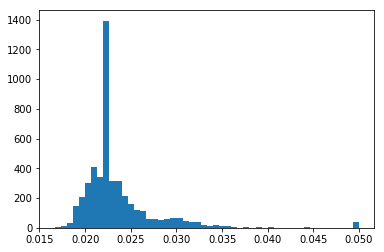

In [321]:
r = plt.hist(df_mip_oct['ADC_To_MIP'], 50)

In [322]:
df_mip_oct.head()

MIP  chi2/ndf  error_on_MIP  use_average  ADC_To_MIP
Module Chip Channel                                                        
78     0    0        44.78      0.47          1.32            0    0.022331
            2        42.84      0.64          0.37            0    0.023343
            4        41.39      1.01          0.20            0    0.024160
            6        43.72      0.53          2.58            0    0.022873
            8        41.87      0.89          0.19            0    0.023883

#### Update the MIP values from the calibration df

In [323]:
df_calib_oct.update(df_mip_oct)

In [324]:
df_calib_oct.head()

ADC_To_MIP  LowGain_To_HighGain_Transition  \
Module_ID ASIC_ID Channel                                               
78        0       0          0.022331                         1981.94   
                  2          0.023343                         2199.04   
                  4          0.024160                         2425.46   
                  6          0.022873                         1574.05   
                  8          0.023883                         1861.80   

                           LowGain_To_HighGain_Conversion  \
Module_ID ASIC_ID Channel                                   
78        0       0                               6.97446   
                  2                               7.15292   
                  4                               7.09049   
                  6                               6.42506   
                  8                               7.71961   

                           TOT_To_LowGain_Transition  \
Module_ID ASIC_ID Channel                              
78        0       0                           1200.0   
                  2                           1200.0   
                  4                           1200.0   
                  6                           1200.0   
                  8                           1200.0   

                           TOT_To_LowGain_Conversion  TOT_Offset  \
Module_ID ASIC_ID Channel                                          
78        0       0                              5.0       180.0   
                  2                              5.0       180.0   
                  4                              5.0       180.0   
                  6                              5.0       180.0   
                  8                              5.0       180.0   

                           Fully_calibrated  
Module_ID ASIC_ID Channel                    
78        0       0                       0  
                  2                       0  
                  4                       0  
                  6                       0  
                  8                       0

(array([ 398., 2760.,  923.,  298.,  212.,   71.,   17.,    7.,    9.,
          41.]),
 array([0.01666667, 0.02      , 0.02333333, 0.02666667, 0.03      ,
        0.03333333, 0.03666667, 0.04      , 0.04333333, 0.04666667,
        0.05      ]),
 <a list of 10 Patch objects>)

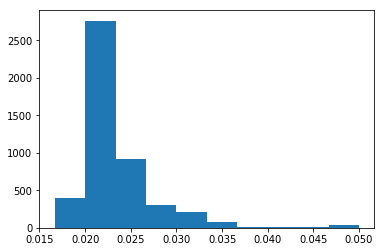

In [325]:
sel = df_calib_oct['ADC_To_MIP'] > 0
plt.hist(df_calib_oct[sel]['ADC_To_MIP'])

In [326]:
df_calib_oct[sel]['ADC_To_MIP'].median()

0.022222222222222223

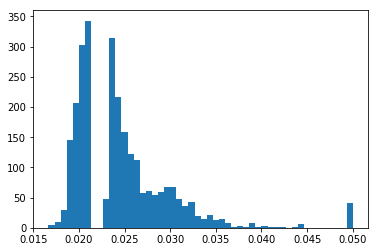

In [351]:
sel = abs(df_calib_oct['ADC_To_MIP'] - 0.02222222222222222) > 0.001 
r = plt.hist(df_calib_oct[sel]['ADC_To_MIP'], 50)

(array([7239.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          57.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

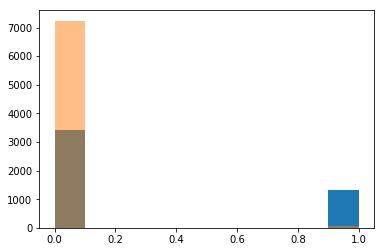

In [328]:
sel = df_calib_oct['ADC_To_MIP'] > 0
plt.hist(df_calib_oct[sel]['Fully_calibrated'])

sel = df_calib_oct['ADC_To_MIP'] < 0
plt.hist(df_calib_oct[sel]['Fully_calibrated'], alpha = 0.5)

In [329]:
sel = df_calib_oct['ADC_To_MIP'] < 0
df_calib_oct.loc[sel,'Fully_calibrated'] = 0

In [330]:
sel = df_calib_oct['ADC_To_MIP'] < 0
df_calib_oct.loc[sel,'ADC_To_MIP'] = 0.0227

In [331]:
df_calib_oct.head()

ADC_To_MIP  LowGain_To_HighGain_Transition  \
Module_ID ASIC_ID Channel                                               
78        0       0          0.022331                         1981.94   
                  2          0.023343                         2199.04   
                  4          0.024160                         2425.46   
                  6          0.022873                         1574.05   
                  8          0.023883                         1861.80   

                           LowGain_To_HighGain_Conversion  \
Module_ID ASIC_ID Channel                                   
78        0       0                               6.97446   
                  2                               7.15292   
                  4                               7.09049   
                  6                               6.42506   
                  8                               7.71961   

                           TOT_To_LowGain_Transition  \
Module_ID ASIC_ID Channel                              
78        0       0                           1200.0   
                  2                           1200.0   
                  4                           1200.0   
                  6                           1200.0   
                  8                           1200.0   

                           TOT_To_LowGain_Conversion  TOT_Offset  \
Module_ID ASIC_ID Channel                                          
78        0       0                              5.0       180.0   
                  2                              5.0       180.0   
                  4                              5.0       180.0   
                  6                              5.0       180.0   
                  8                              5.0       180.0   

                           Fully_calibrated  
Module_ID ASIC_ID Channel                    
78        0       0                       0  
                  2                       0  
                  4                       0  
                  6                       0  
                  8                       0

In [332]:
df_calib_oct.reset_index().to_csv('hgcal_calibration_config1_oct2018_fromOctTB_v2.txt',
                                  index=False, sep = "\t", float_format='%g')

In [333]:
! head hgcal_calibration_config1_oct2018_fromOctTB.txt

Module_ID	ASIC_ID	Channel	ADC_To_MIP	LowGain_To_HighGain_Transition	LowGain_To_HighGain_Conversion	TOT_To_LowGain_Transition	TOT_To_LowGain_Conversion	TOT_Offset	Fully_calibrated
78	0	0	0.0223314	1981.94	6.97446	1200	5	180	0
78	0	2	0.0233427	2199.04	7.15292	1200	5	180	0
78	0	4	0.0241604	2425.46	7.09049	1200	5	180	0
78	0	6	0.0228728	1574.05	6.42506	1200	5	180	0
78	0	8	0.0238834	1861.8	7.71961	1200	5	180	0
78	0	10	0.0193761	2335.52	7.22289	1200	5	180	0
78	0	12	0.023753	1876.18	6.84206	1200	5	180	0
78	0	14	0.0245881	2347.93	8.03683	1200	5	180	0
78	0	16	0.0240038	1998.11	7.4974	1200	5	180	0


In [334]:
nchan = len(df_calib_oct)

(array([    0.,     0.,     0.,     0.,     0., 12032.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

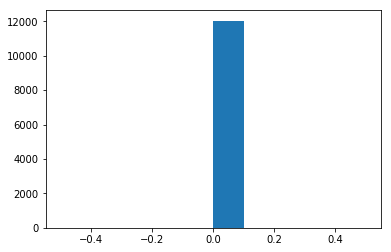

In [335]:
plt.hist(df_calib_oct['TOT_To_LowGain_Transition'] < 0)

(array([    0.,     0.,     0.,     0.,     0., 12032.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

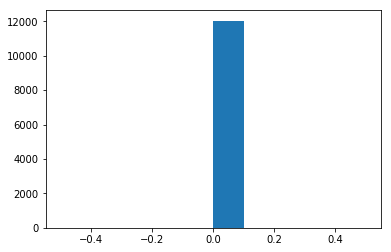

In [336]:
plt.hist(df_calib_oct['TOT_To_LowGain_Conversion'] < 0)